We will perform analysis and cleaning with data on motor vehicle collisions released by New York City and published on the NYC OpenData website (https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95). There is data on over 1.5 million collisions dating back to 2012, with additional data continuously added. We'll work with an extract of the full data: Crashes from the year 2018. Our data set is in a CSV called nypd_mvc_2018.csv. We can read our data into a pandas dataframe and inspect the first few rows of the data:

In [146]:
import pandas as pd
import numpy as np
mvc = pd.read_csv("nypd_mvc_2018.csv")
mvc.head(10)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,0,0.0,0,0,0,0.0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,0,0.0,0,0,0,0.0,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,1,1.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,0,0.0,0,0,0,0.0,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,0,0.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN
5,3987177,2018-09-14,11:50,NaN,"(40.785984, -73.95718)",EAST 93 STREET,NaN,NaN,0,0,0,0.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Box Truck,NaN,NaN,NaN,Driver Inattention/Distraction,Passing Too Closely,NaN,NaN,NaN
6,4008417,2018-10-19,11:00,QUEENS,"(40.731968, -73.923225)",54 AVENUE,44 STREET,NaN,0,0,0,0.0,0,0,0,0.0,Sedan,Sedan,NaN,NaN,NaN,Unspecified,Unspecified,NaN,NaN,NaN
7,3917518,2018-06-05,10:00,NaN,"(40.660114, -74.00191)",3 AVENUE,NaN,NaN,0,0,0,0.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Unspecified,Unspecified,NaN,NaN,NaN
8,3953286,2018-08-03,22:30,QUEENS,"(40.666393, -73.75177)",NORTH CONDUIT AVENUE,225 STREET,NaN,0,0,3,3.0,0,0,0,0.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Unspecified,Unspecified,NaN,NaN,NaN
9,3896388,2018-05-08,8:40,QUEENS,"(40.715763, -73.737755)",218 STREET,99 AVENUE,NaN,0,0,0,0.0,0,0,0,0.0,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN,NaN


In [147]:
mvc.shape

(57864, 26)

We can see a lot of NaN values already. Let's count the number of null values in each of the columns in the mvc dataframe above.

In [148]:
null_counts = mvc.isnull().sum()

print(null_counts)

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64


To give us a better picture of the null values in the data, let's calculate the percentage of null values in each column.

In [149]:
null_df = pd.DataFrame(null_counts)

In [150]:
null_df.columns = ["null_counts"]
null_df["null_pct"] = null_df["null_counts"]*100/mvc.shape[0]
# Rotate the dataframe so that rows become columns and vice-versa
null_df = null_df.T.astype(int)
pd.set_option('display.max_columns', None)
null_df.head(10)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,0,1,0,0,0,5,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,0,35,6,24,50,76,0,0,0,0,0,0,0,0,0,21,93,98,99,0,15,93,98,99


About a third of the columns have no null values, with the rest ranging from less than 1% to 99%.  Let's continue by looking at the group of columns that relate to people killed in collisions.

In [151]:
killed_cols = [column_name for column_name in mvc.columns if column_name.find("kill")>0]
null_df[killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


In [152]:
killed = mvc[killed_cols].copy()
killed_manual_sum = killed.iloc[:,0] + killed.iloc[:,1] + killed.iloc[:,2]
killed_mask = killed_manual_sum != killed["total_killed"]
killed_non_eq = killed[killed_mask]

In [153]:
killed_non_eq.head(10)

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


The dataframe we created above contained six rows showing a discrepancy between the sum of the first three columns and the fourth column that lists the total. Clearly, five of the six columns for the total contain null while they should actually be zero, and the other should have a value of 1 instead of 0. Let's replace all null values with the equivalent values from our killed_manual_sum series:

In [154]:
killed_null = killed['total_killed'].isnull()
killed['total_killed'] = killed['total_killed'].mask(killed_null, killed_manual_sum)

Next replace any values where the manual sum and the total column aren't equal with np.nan

In [155]:
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

In [156]:
killed_non_eq = killed[killed_mask]
killed_non_eq.head(10)

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,0.0
20163,0,0,0,0.0
22046,0,0,1,NaN
48719,0,0,0,0.0
55148,0,0,0,0.0
55699,0,0,0,0.0


We've cleaned the data set and reduced the five null value occurances to one, and flagged some suspicious data. Let's do the same for the injured columns below.

In [157]:
# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured_null = injured["total_injured"].isnull()
injured["total_injured"].mask(injured_null,injured_manual_sum,inplace=True)
injured[(injured["total_injured"]!=injured_manual_sum)].head(25)

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,0.0
3263,0,0,3,4.0
3362,0,0,0,1.0
3508,0,0,0,2.0
10989,0,0,0,1.0
12885,1,0,0,0.0
13344,0,0,0,1.0
15213,0,0,0,2.0
20163,0,0,0,1.0
20978,0,0,0,1.0


We can see there are clear discrepencies, and we don't know which sum to trust. So we can mark these values as NaN.

In [158]:
injured["total_injured"].mask(injured["total_injured"]!=injured_manual_sum, np.nan,inplace=True)

In [159]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
print("Summary of the number of null values before and after our changes in order to clean the values","\n")
print(pd.DataFrame(summary, index=['before','after']))

Summary of the number of null values before and after our changes in order to clean the values 

        injured  killed
before        1       5
after        21       1


Assign the updated values from the killed and injured dataframe back to the main mvc dataframe.

In [160]:
mvc["total_injured"]=injured["total_injured"]
mvc["total_killed"]=killed["total_killed"]

Let's use a plot to visualize the missing values, using heat maps. We can use seaborn.heatmap() to represent null values as light squares and non-null values as dark squares

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [162]:
def plot_null_matrix(df, figsize=(10,5)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

Let's plot the null matrix for the whole dataframe we are working with:

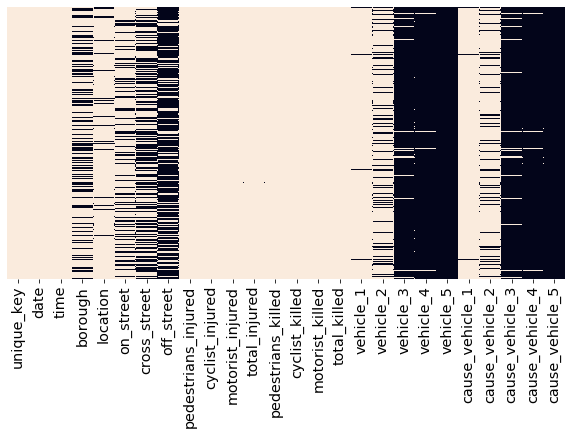

In [163]:
plot_null_matrix(mvc)

It appears that most of the missing data is centered around vehicles 3-5 dataas well as some street address information. 

Create function to create correlation plots and then plot the data in the last ten columns to see if we can isolate any trends or get some insight into the relationship between the data in the columns.

In [164]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(18,12))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

Create a list of column names containing the substring 'vehicle'

In [165]:
list_vehicles = [column for column in mvc.columns if "vehicle" in column]
print(list_vehicles)

['vehicle_1', 'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5', 'cause_vehicle_1', 'cause_vehicle_2', 'cause_vehicle_3', 'cause_vehicle_4', 'cause_vehicle_5']


Now select only the columns in the list above from the mvc dataframe. Pass the result to the plot_null_correlations() function

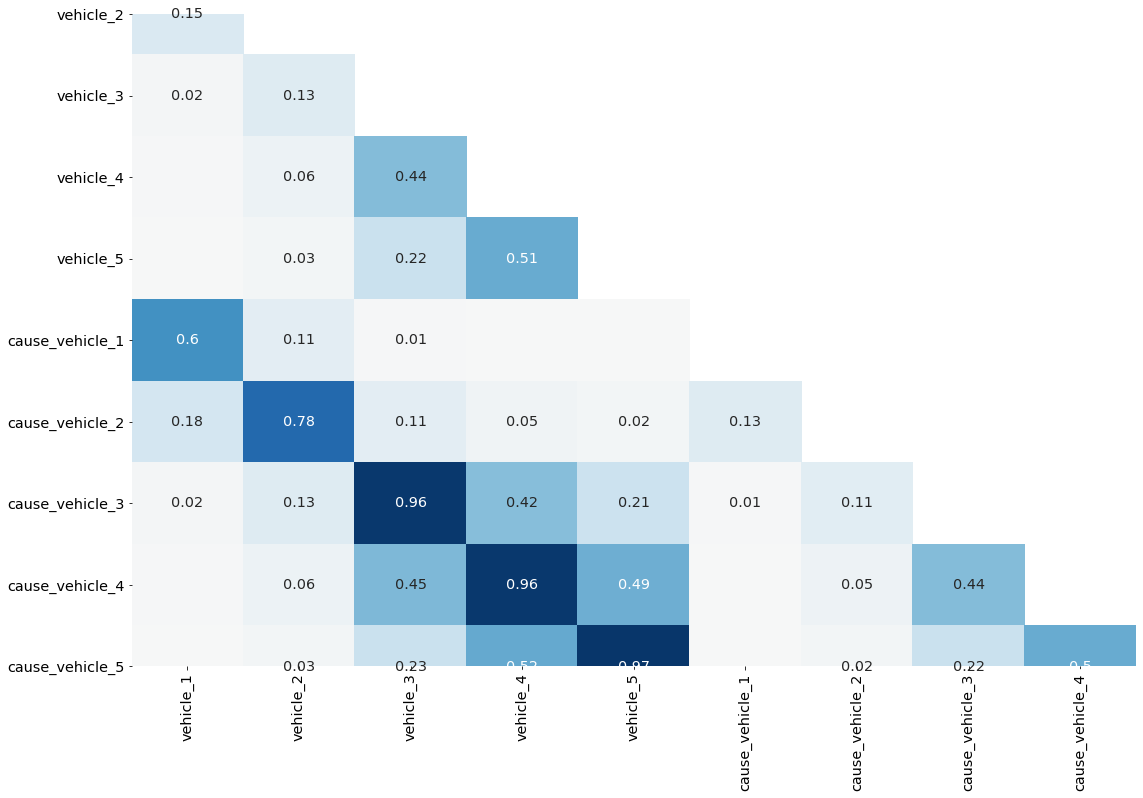

In [166]:
plot_null_correlations(mvc[list_vehicles])

There are several pairs of columns with a strong correlation. The pairs of column names that make up these correlations are related to each other. For example, columns cause_vehicle_4 and vehicle_4 are present together or not present together. This makes sense since if a fourth vehicle was present, it would likely have some data assoiated with it related to cause of the accident (details or unspecified). Let's further explore the variations in missing values from these five pairs of columns. 

In [167]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[v_col].notnull() & mvc[c_col].isnull()).sum()
    vc_null_data.append([v, v_null, c_null])
   
vc_null_df = pd.DataFrame(vc_null_data)
vc_null_df.columns = col_labels
vc_null_df.head()

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


It appears that there are almost 4500 rows of data where either the vehicle or the cause data is missing while the other is present. 

Let's attempt to count the most common values for the cause set of columns and create a frequency table.

In [168]:
cause_cols = [col for col in mvc.columns if "cause_" in col]
cause = mvc[cause_cols]
cause.head()

,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,Following Too Closely,Unspecified,NaN,NaN,NaN
1,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,Following Too Closely,Unspecified,NaN,NaN,NaN
3,Glare,Passing Too Closely,NaN,NaN,NaN
4,Turning Improperly,Unspecified,NaN,NaN,NaN


In [169]:
# stack the values into a single series object and get the frequency table
top10_causes = cause.stack().value_counts().head(10)
top10_causes.head(10)

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64

The most common non-null value for the cause columns is Unspecified, which presumably indicates that the officer reporting the collision was unable to determine the cause for that vehicle.

Let's similarly identify the most common non-null value for the vehicle columns.

In [170]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
print(v_cols)

['vehicle_1', 'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5']


In [171]:
vehicles = mvc[v_cols]
vehicles.head()

,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5
0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN
2,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
3,Sedan,Sedan,NaN,NaN,NaN
4,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [172]:
top10_vehicles = vehicles.stack().value_counts().head(10)
top10_vehicles.head(10)

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

We can clean our data set some more by implementing some more changes. For values where the vehicle is null and the cause is non-null, we can set the vehicle to Unspecified. For values where the cause is null and the vehicle is not-null, we can set the cause to Unspecified.

In [193]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summarize_missing().head()


,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


In [194]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    # create a mask for each column
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()

    # replace the values matching the mask for each column
    mvc[v_col] =  mvc[v_col].mask(v_missing_mask, "Unspecified")
    mvc[c_col] =  mvc[c_col].mask(c_missing_mask, "Unspecified")

summary_after = summarize_missing()
summary_after.head()

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


Let's view the null correlation plot for the last 10 columns after all the changes we have made so far.

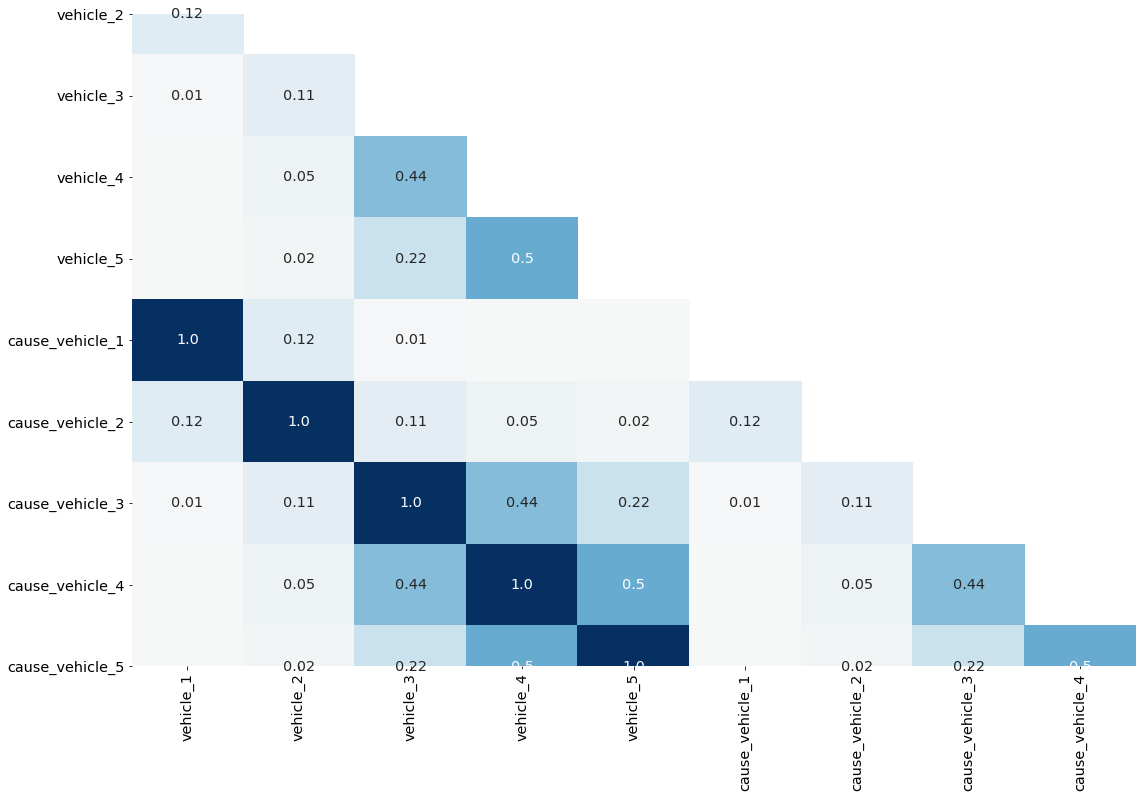

In [175]:
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

Clearly, the correlation between the column pairs is vastly improved as a result of our cleaning operations.

Now let's look at the set of columns that relate to the location of the accident as they contain missing values also.

In [177]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data.head(10)

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN
5,NaN,"(40.785984, -73.95718)",EAST 93 STREET,NaN,NaN
6,QUEENS,"(40.731968, -73.923225)",54 AVENUE,NaN,44 STREET
7,NaN,"(40.660114, -74.00191)",3 AVENUE,NaN,NaN
8,QUEENS,"(40.666393, -73.75177)",NORTH CONDUIT AVENUE,NaN,225 STREET
9,QUEENS,"(40.715763, -73.737755)",218 STREET,NaN,99 AVENUE


Let's look at counts of the null values in each of these columns:

In [179]:
location_data.isnull().sum()

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64

Before we make any changes, let's look for correlations between the missing values:

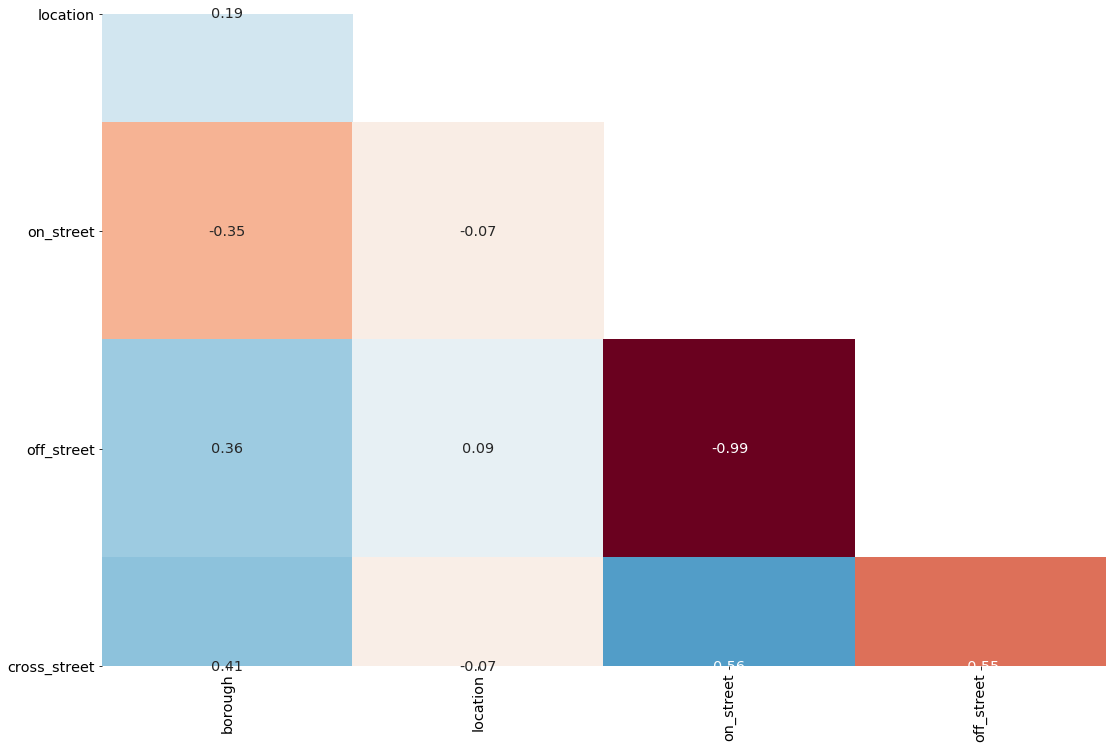

In [180]:
plot_null_correlations(mvc[loc_cols])

Also, we can plot a null matrix to view missing data in these columns:

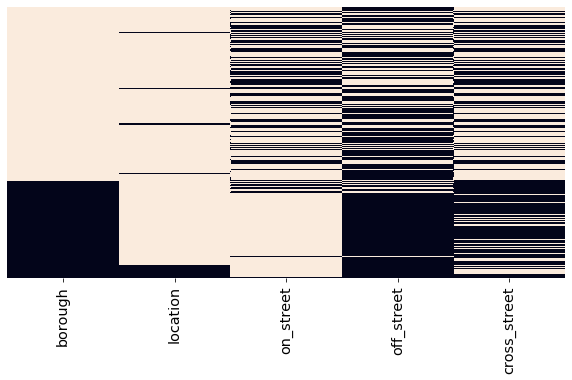

In [182]:
sorted_location_data = location_data.sort_values(loc_cols)
plot_null_matrix(sorted_location_data)

About one-thirds of rows have null values for borough, but of those values that are missing, most have non-null values for location and one or more of the street name columns. Furthermore, a small number of rows have missing values in the location column, but most of these have non-null values in one or more of the street name columns. This implies that we will be able to impute much of the missing values by using the other columns in each row.

We have supplemental data created using the GeoPy package, which makes working with Geocoding APIs like the Google Maps API easier. Here's the strategy we used to prepare the supplemental data: 
- For rows with location values but missing values in either borough or the street name columns, we used geocoding APIs to look up the location coordinates to find the missing data.
- For rows with values in the street name columns missing borough and/or location data, we used geocoding APIs to look up the address to find the missing data.

The supplemental data is in a CSV called supplemental_data.csv. The supplemental data has five columns from our original data set — the unique_key that identifies each collision, and four of the five location columns.

In [185]:
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


Let's take a look at a null matrix for the supplemental data:

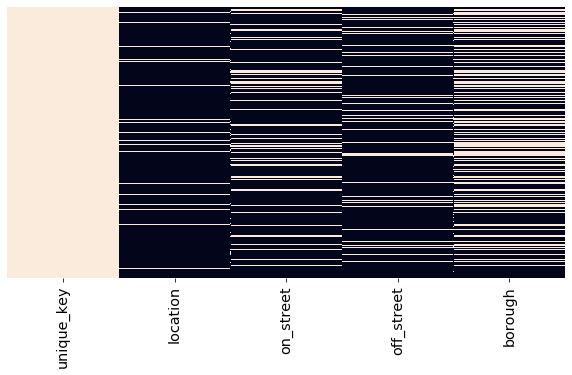

In [189]:
plot_null_matrix(sup_data)

In [192]:
k1 = sup_data["unique_key"]
k2 = mvc["unique_key"]
print("Are unique keys the same and in the exact same order?\n",k1.equals(k2))

Are unique keys the same and in the exact same order?
 True


As the unique_key column in both the original and supplemental data has the same values in the same order, we'll be able to use Series.mask() to add our supplemental data to our original data. Let's use it to impute missing values.

In [197]:
location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()
null_before.head()

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64

In [198]:
for column in location_cols:
    mvc[column].mask(mvc[column].isnull(),sup_data[column],inplace=True)

null_after = mvc[location_cols].isnull().sum()
null_after.head()

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64

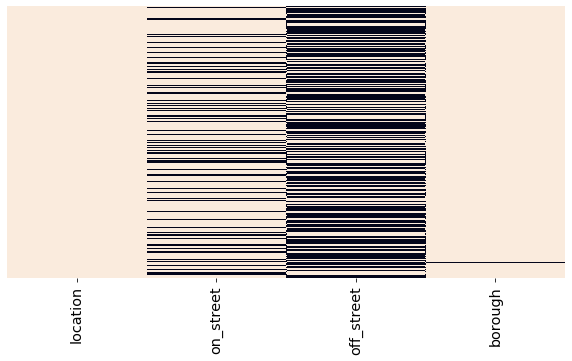

In [199]:
plot_null_matrix(mvc[location_cols])